## TABLE OF CONTENTS

#### 1.Importing Libraries

#### 2. EDA

#### 3. Model Building

#### 4. Cross Validation

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
walmart_dataset=pd.read_csv('walmart.csv')

### 2.EDA(Exploratory Data Analysis)

In [3]:
walmart_dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
walmart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
walmart_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [7]:
walmart_dataset.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
walmart_dataset.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

##### Changing the Date columns data type to datetime64

In [9]:
from datetime import datetime

In [10]:
walmart_dataset['Date']=pd.to_datetime(walmart_dataset['Date'])

In [11]:
walmart_dataset.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

##### Descriptive Statistics

In [12]:
walmart_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


##### Checking for missing values 

In [13]:
walmart_dataset.isnull().sum() # No missing values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

##### Which store has maximum sales

In [21]:
walmart_dataset.groupby(walmart_dataset['Store'])['Weekly_Sales'].sum().round().sort_values(ascending=False)

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613905.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

##### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [24]:
standard_deviation_store=walmart_dataset.groupby(walmart_dataset['Store'])['Weekly_Sales'].std().round(3).sort_values(ascending=False)

In [26]:
pd.DataFrame(standard_deviation_store).head()

,Weekly_Sales
Store,
14,317569.949
10,302262.063
20,275900.563
4,266201.442
13,265506.996


In [29]:
store14=walmart_dataset.loc[walmart_dataset['Store']==14]['Weekly_Sales']

In [30]:
store14

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

In [37]:
mean_to_stddev=(store14.std()/store14.mean()*100)

In [38]:
mean_to_stddev

15.713673600948338

##### Which store/s has good quarterly growth rate in Q3’2012 

In [52]:
q2_sales=walmart_dataset.loc[(walmart_dataset['Date']>=pd.Timestamp(2012,4,1)) & (walmart_dataset['Date']<= pd.Timestamp(2012,6,30))].groupby(['Store'])['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [53]:
q2_sales.head()

Store
4     28384185.0
20    27550181.0
13    26803226.0
2     25085124.0
14    24427769.0
Name: Weekly_Sales, dtype: float64

In [57]:
q3_sales=walmart_dataset.loc[(walmart_dataset['Date']>=pd.Timestamp(2012,7,1)) & (walmart_dataset['Date']<=pd.Timestamp(2012,9,20))].groupby(['Store'])['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [59]:
q3_sales.head()

Store
4     21505061.0
20    20629000.0
13    20453951.0
2     18820981.0
10    17802636.0
Name: Weekly_Sales, dtype: float64

In [60]:
q3_growth=pd.DataFrame({
    'Q2_Sales':q2_sales,
    'Q3_Sales':q3_sales,
    'Difference':(q3_sales-q2_sales),
    'Growth_Rate':((q3_sales-q2_sales)/q2_sales)*100
})

In [62]:
q3_growth.head()

,Q2_Sales,Q3_Sales,Difference,Growth_Rate
Store,,,,
1,21036966.0,15690025.0,-5346941.0,-25.416883
2,25085124.0,18820981.0,-6264143.0,-24.971545
3,5562668.0,4162291.0,-1400377.0,-25.174557
4,28384185.0,21505061.0,-6879124.0,-24.235764
5,4427262.0,3263173.0,-1164089.0,-26.293655


In [63]:
q3_growth.sort_values(by=['Growth_Rate'],ascending=False)

,Q2_Sales,Q3_Sales,Difference,Growth_Rate
Store,,,,
16,6626133.0,5461761.0,-1164372.0,-17.572421
7,7613594.0,6266006.0,-1347588.0,-17.699762
35,10753571.0,8665720.0,-2087851.0,-19.415420
26,13218290.0,10491765.0,-2726525.0,-20.626912
23,18283425.0,14445992.0,-3837433.0,-20.988589
41,17560036.0,13789051.0,-3770985.0,-21.474814
39,20191586.0,15848676.0,-4342910.0,-21.508513
44,4322555.0,3329160.0,-993395.0,-22.981662
21,9226280.0,7089259.0,-2137021.0,-23.162325


In [70]:
import plotly.express as px


In [93]:
q3_growth['Store']=q3_growth.index

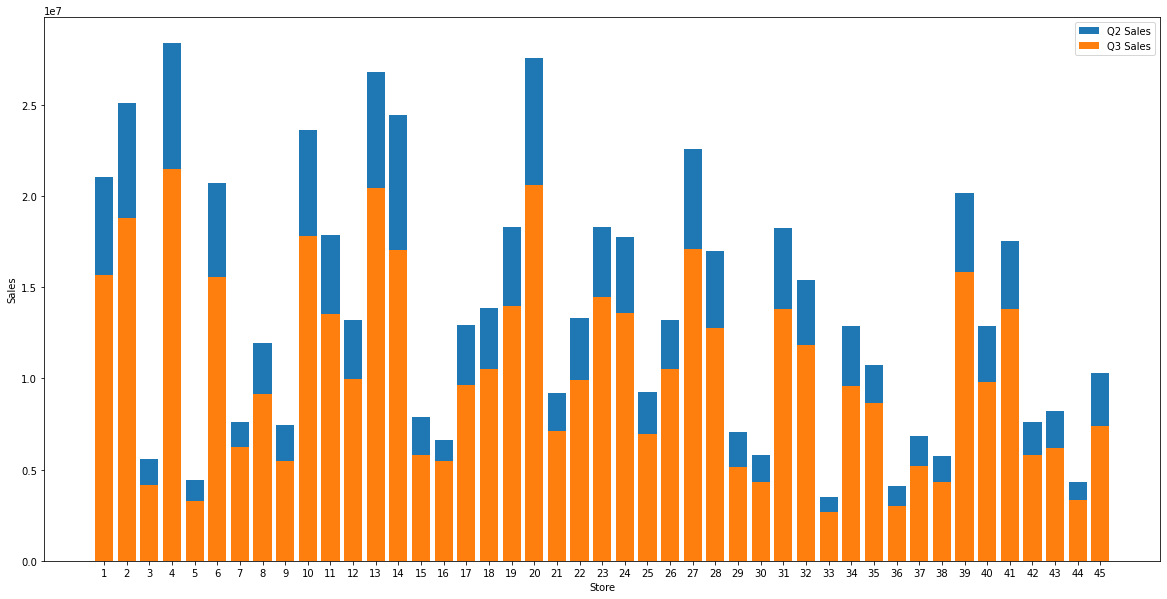

In [112]:
plt.figure(figsize=(20,10))
plt.bar(q3_growth['Store'],q3_growth['Q2_Sales'],label='Q2 Sales')
plt.bar(q3_growth['Store'],q3_growth['Q3_Sales'],label='Q3 Sales')
plt.ylabel('Sales')
plt.xlabel('Store')
plt.xticks(q3_growth['Store'])

plt.legend()


##### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [114]:
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [132]:
super_bowl_sales=round(walmart_dataset.loc[walmart_dataset['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean(),2)

In [133]:
super_bowl_sales

1079127.99

In [134]:
labour_day_sales=round(walmart_dataset.loc[walmart_dataset.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)

In [135]:
labour_day_sales

1042427.29

In [136]:
thanksgiving_sales=round(walmart_dataset.loc[walmart_dataset.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)

In [138]:
thanksgiving_sales

1471273.43

In [139]:
christmas_sales=round(walmart_dataset.loc[walmart_dataset.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)

In [140]:
christmas_sales

960833.11

In [143]:
non_holiday_sales=round(walmart_dataset.loc[walmart_dataset['Holiday_Flag'] == 0]['Weekly_Sales'].mean(),2)

In [144]:
non_holiday_sales

1041256.38

<AxesSubplot:label='b0e53d5f-1561-426d-8014-880420cbac78', title={'center':'Holidays Sales VS Normal Sales'}, xlabel='Holidays', ylabel='Sales in Millions'>

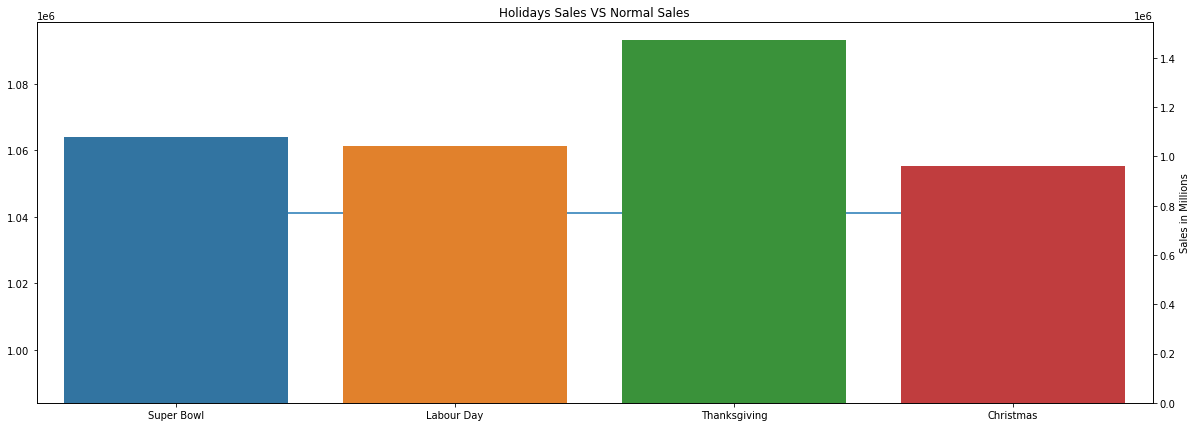

In [187]:
fig,ax1=plt.subplots(figsize=(20,7))
sns.lineplot(data=4*[non_holiday_sales],marker='o',ax=ax1)
ax2=ax1.twinx()
plt.title('Holidays Sales VS Normal Sales')
plt.ylabel('Sales in Millions')
plt.xlabel('Holidays')

sns.barplot(x=['Super Bowl','Labour Day','Thanksgiving','Christmas'],y=[super_bowl_sales,labour_day_sales,thanksgiving_sales,christmas_sales])


##### Provide a monthly and semester view of sales in units and give insights.

In [188]:
walmart_dataset['Month']=walmart_dataset['Date'].dt.month

In [189]:
walmart_dataset['Year']=walmart_dataset['Date'].dt.year

##### Year 2010 monthly sales

In [203]:
year_2010=walmart_dataset.loc[walmart_dataset['Year']==2010].groupby(['Month'])['Weekly_Sales'].sum()

<AxesSubplot:title={'center':'2010 Montly Sales'}, xlabel='Month', ylabel='Sales in Milions'>

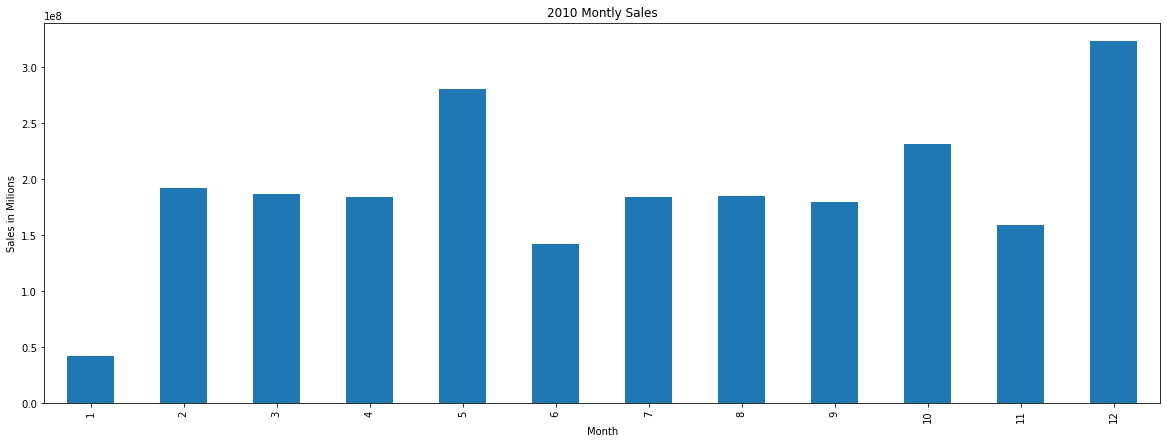

In [208]:
plt.figure(figsize=(20,7))
plt.title('2010 Montly Sales')
plt.ylabel('Sales in Milions')
year_2010.plot(kind='bar')

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int64
Year                     int64
dtype: object

##### Year 2011 monthly sales

In [209]:
year_2011=walmart_dataset.loc[walmart_dataset['Year']==2011].groupby(['Month'])['Weekly_Sales'].sum()

<AxesSubplot:title={'center':'2011 Montly Sales'}, xlabel='Month', ylabel='Sales in Milions'>

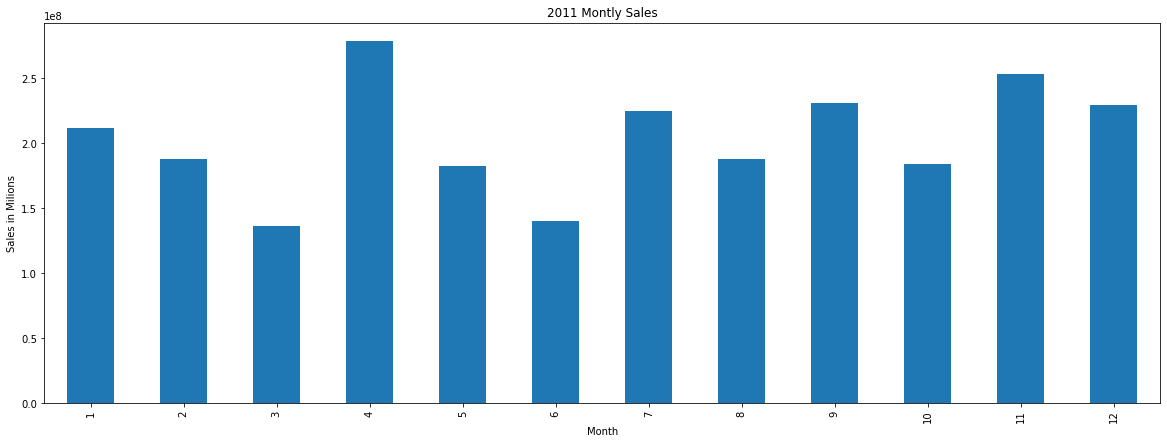

In [210]:
plt.figure(figsize=(20,7))
plt.title('2011 Montly Sales')
plt.ylabel('Sales in Milions')
year_2011.plot(kind='bar')

##### Year 2012 monthly sales

In [212]:
year_2012=walmart_dataset.loc[walmart_dataset['Year']==2012].groupby(['Month'])['Weekly_Sales'].sum()

<AxesSubplot:title={'center':'2012 Montly Sales'}, xlabel='Month', ylabel='Sales in Milions'>

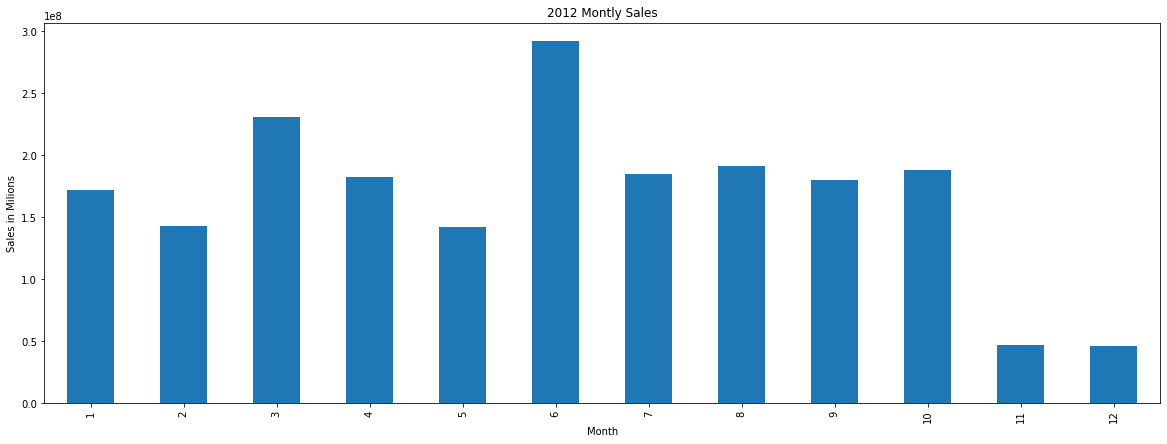

In [213]:
plt.figure(figsize=(20,7))
plt.title('2012 Montly Sales')
plt.ylabel('Sales in Milions')
year_2012.plot(kind='bar')

##### Yearly Sales

In [214]:
yearly_sales=walmart_dataset.groupby(['Year'])['Weekly_Sales'].sum()

In [215]:
yearly_sales

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

<AxesSubplot:title={'center':'Sales by Year'}, xlabel='Year', ylabel='Sales in Milions'>

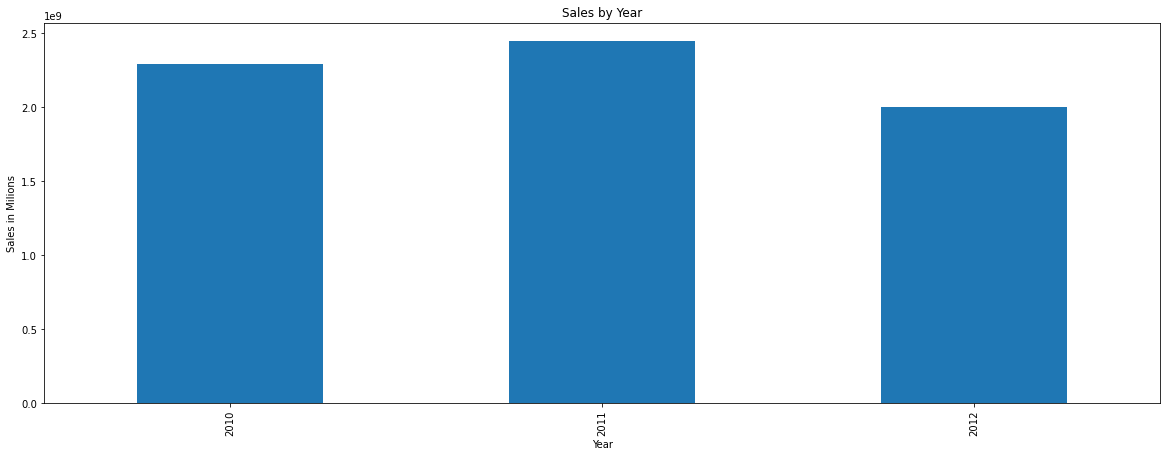

In [217]:
plt.figure(figsize=(20,7))
plt.title('Sales by Year')
plt.ylabel('Sales in Milions')
plt.xticks(rotation=90)
yearly_sales.plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

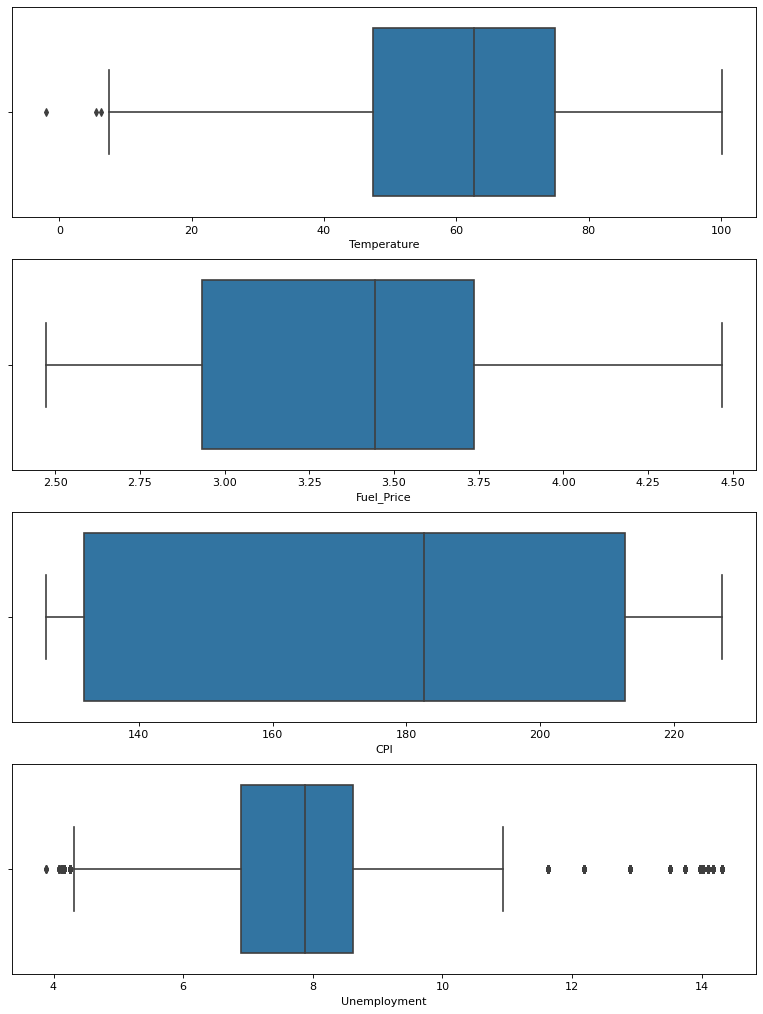

In [221]:
fig,axis=plt.subplots(4,figsize=(12,16),dpi=80)
x=walmart_dataset[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(x):
    sns.boxplot(walmart_dataset[column],ax=axis[i])

In [222]:
walmart_dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

### 3.Building the Model

##### Define Independent and Dependent Variables

In [224]:
x=walmart_dataset[['Store','Fuel_Price','CPI','Unemployment','Month','Year']]
y=walmart_dataset['Weekly_Sales']

##### Import Libraries

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

In [229]:
sc=StandardScaler()

In [230]:
X_train=sc.fit_transform(X_train)

In [231]:
X_test=sc.fit_transform(X_test)

##### Liniar Regression

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [235]:
lr=LinearRegression()

In [236]:
lr.fit(X_train,y_train)

LinearRegression()

In [237]:
lr_predictions=lr.predict(X_test)

In [238]:
lr.score(X_train,y_train)*100

14.525193410777671

In [239]:
r2_score(y_test,lr_predictions)*100

14.232110110900997

In [240]:
metrics.mean_absolute_error(y_test,lr_predictions)

435069.9733782287

In [241]:
metrics.mean_squared_error(y_test,lr_predictions)

282139252657.852

In [243]:
np.sqrt(metrics.mean_squared_error(y_test,lr_predictions))

531167.8196745845

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weekly_Sales'>

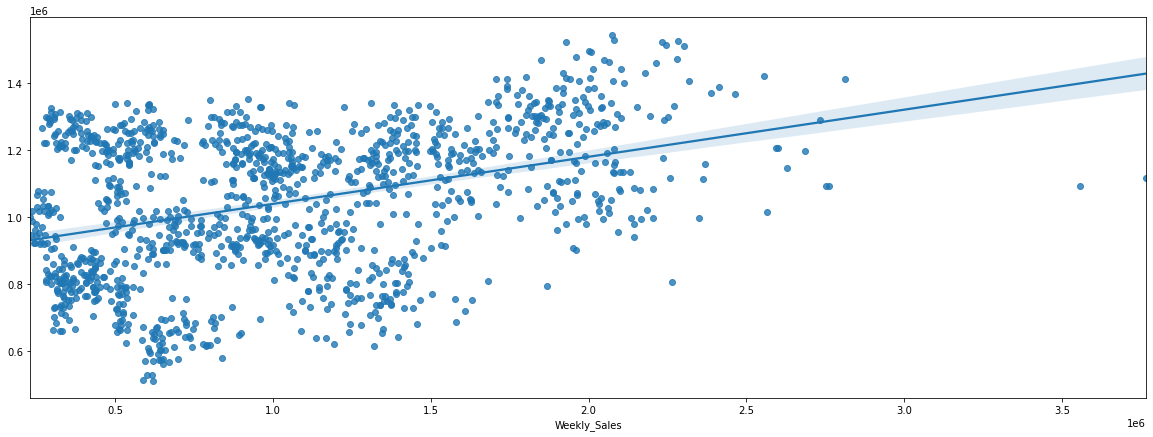

In [244]:
plt.figure(figsize=(20,7))
sns.regplot(y_test,lr_predictions)

##### Random Forest

In [245]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
rfr=RandomForestRegressor()

In [247]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [248]:
rfr_predict=rfr.predict(X_test)

In [249]:
r2_rfr=r2_score(y_test,rfr_predict)*100

In [250]:
r2_rfr

91.51072313622853

In [251]:
mae=metrics.mean_absolute_error(y_test,rfr_predict)

In [252]:
mse=metrics.mean_squared_error(y_test,rfr_predict)

In [257]:
rmse=np.sqrt(mse)

In [258]:
mae

88276.41224428905

In [259]:
mse

27926048233.75159

In [260]:
rmse

167110.88604202776

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weekly_Sales'>

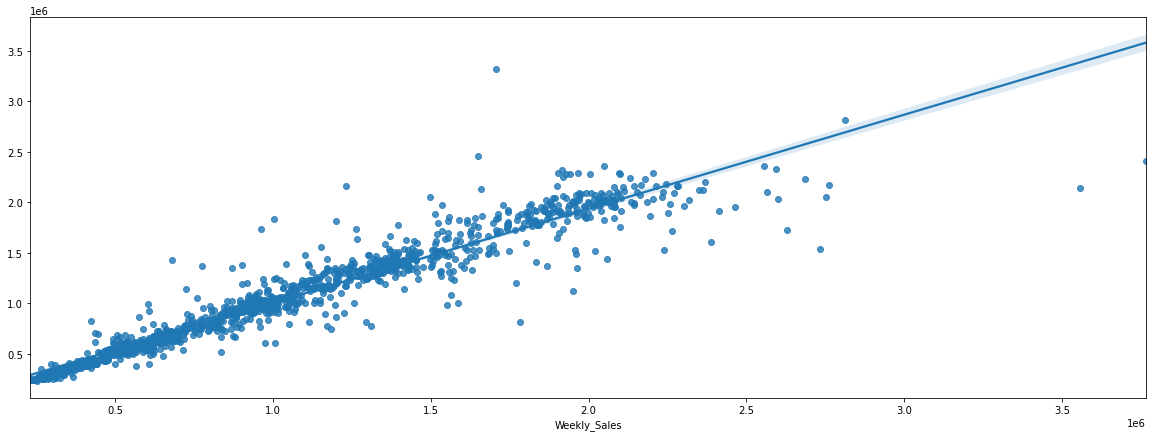

In [261]:
plt.figure(figsize=(20,7))
sns.regplot(y_test,rfr_predict)

##### Decision Tree Regressor

In [263]:
from sklearn.tree import DecisionTreeRegressor

In [264]:
dtr=DecisionTreeRegressor()

In [265]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [266]:
dtr_predict=dtr.predict(X_test)

In [267]:
r2_dtr=r2_score(y_test,dtr_predict)*100

In [268]:
r2_dtr

86.59237862627833

In [269]:
metrics.mean_absolute_error(y_test,dtr_predict)

109764.20783993785

In [270]:
metrics.mean_squared_error(y_test,dtr_predict)

44105273887.379

In [271]:
np.sqrt(metrics.mean_squared_error(y_test,dtr_predict))

210012.55649931743

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weekly_Sales'>

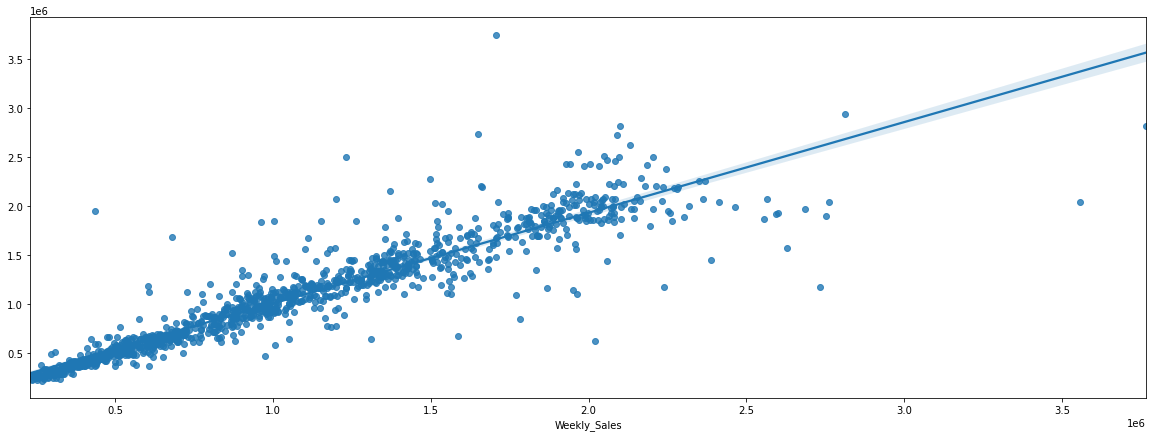

In [273]:
plt.figure(figsize=(20,7))
sns.regplot(y_test,dtr_predict)

##### K Nearest Neighbors

In [275]:
from sklearn.neighbors import KNeighborsRegressor

In [276]:
kn=KNeighborsRegressor()

In [277]:
kn.fit(X_train,y_train)

KNeighborsRegressor()

In [278]:
kn_predict=kn.predict(X_test)

In [279]:
r2_kn=r2_score(y_test,kn_predict)*100

In [280]:
r2_kn

61.358547999568344

In [281]:
metrics.mean_absolute_error(y_test,kn_predict)

245004.2247645688

In [282]:
metrics.mean_squared_error(y_test,kn_predict)

127113659938.6213

In [283]:
np.sqrt(metrics.mean_squared_error(y_test,kn_predict))

356530.02669988584

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weekly_Sales'>

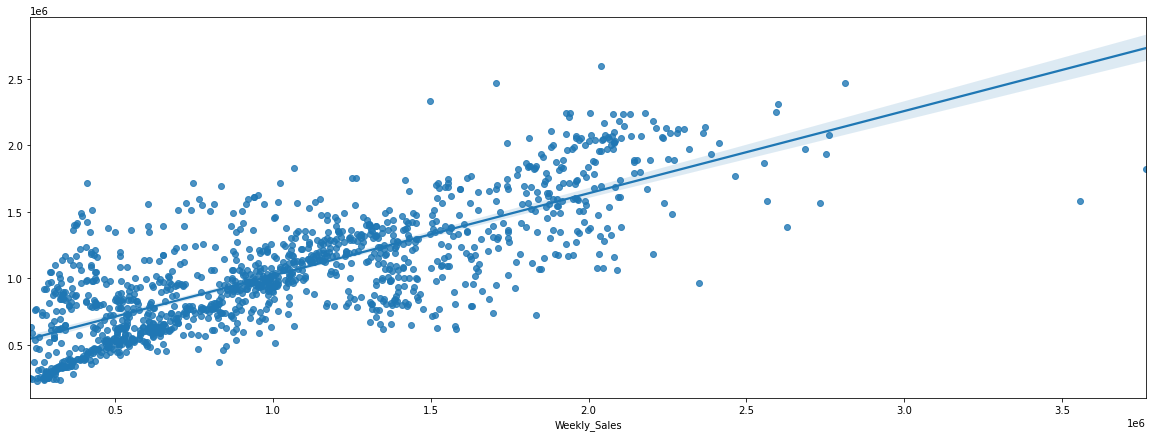

In [284]:
plt.figure(figsize=(20,7))
sns.regplot(y_test,kn_predict)

### 4.Cross Validation

In [285]:
from sklearn.model_selection import cross_val_score

In [286]:
## Liniar Regression

In [288]:
lr_scores=cross_val_score(lr,X_train,y_train,cv=10,scoring='r2')

In [289]:
lr_scores

array([0.14580654, 0.15218607, 0.17368259, 0.17551455, 0.13210603,
       0.12401738, 0.14980497, 0.12734445, 0.10225242, 0.11560056])

In [304]:
round(lr_scores.mean()*100,2)

13.98

In [291]:
## Random Forest

In [292]:
rfr_scores=cross_val_score(rfr,X_train,y_train,cv=10,scoring='r2')

In [293]:
rfr_scores

array([0.93166875, 0.9445432 , 0.93273456, 0.93268954, 0.93195523,
       0.90036612, 0.93336774, 0.93948662, 0.90044751, 0.93262186])

In [305]:
round(rfr_scores.mean()*100,2)

92.8

In [295]:
## Decision Tree Regressor

In [296]:
dtr_scores=cross_val_score(dtr,X_train,y_train,cv=10,scoring='r2')

In [297]:
dtr_scores

array([0.90279973, 0.91736708, 0.89603414, 0.88643357, 0.89425557,
       0.85561227, 0.904055  , 0.9049468 , 0.86190047, 0.90279589])

In [306]:
round(dtr_scores.mean()*100,2)

89.26

In [299]:
## K Nearest Neighbors

In [300]:
kn_scores=cross_val_score(kn,X_train,y_train,cv=10,scoring='r2')

In [301]:
kn_scores

array([0.55457873, 0.58961197, 0.6237888 , 0.57184799, 0.54196983,
       0.5820651 , 0.61699658, 0.55491817, 0.54337236, 0.59796103])

In [307]:
round(kn_scores.mean()*100,2)

57.77

<AxesSubplot:title={'center':'Model Analysis'}, xlabel='Model', ylabel='Accuracy'>

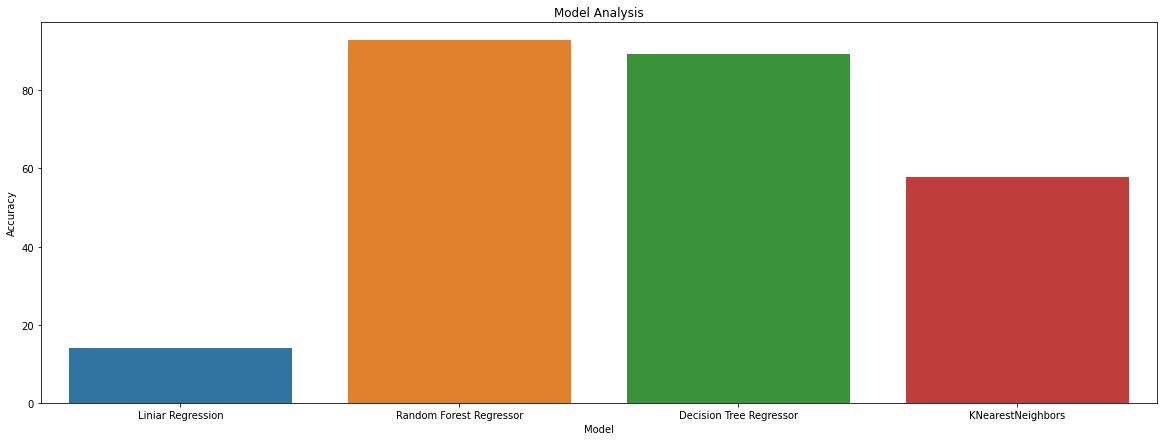

In [308]:
plt.figure(figsize=(20,7))
plt.title('Model Analysis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
sns.barplot(x=['Liniar Regression','Random Forest Regressor','Decision Tree Regressor','KNearestNeighbors'],y=[round(lr_scores.mean()*100,2),round(rfr_scores.mean()*100,2),round(dtr_scores.mean()*100,2),round(kn_scores.mean()*100,2)])